In [15]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def load_data(dts):
    path = 'MuP_dataset/'+dts+'_complete.jsonl'
    with open(path, 'r') as json_file:
        json_list = list(json_file)
        col_name = ["paper_id","summary"]
    summary_df = pd.DataFrame(columns=col_name)
    for json_str in json_list:
        result = json.loads(json_str)
        df = pd.DataFrame([[result["paper_id"], result["summary"]]], columns=col_name)
        summary_df = pd.concat([summary_df,df])
    return summary_df

In [17]:
df_train = load_data("training")
print(len(df_train))
df_train.head()

18934


,paper_id,summary
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge-less regr...
0,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...
0,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...
0,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...
0,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...


In [18]:
df_val = load_data("validation")
print(len(df_val))
df_val.head()

3604


,paper_id,summary
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
0,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
0,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...


In [19]:
def count_num_paper(df):
    num_paper = df.groupby(['paper_id']).count()
    num_paper['num_paper'] = 1
    return num_paper.groupby(['summary']).count()    

In [20]:
num_train = count_num_paper(df_train)
num_train.columns = num_train.columns.str.replace('num_paper', 'training')
num_train

,training
summary,
1,2276
2,2845
3,2116
4,1113
5,10
6,15
7,4


In [21]:
num_val = count_num_paper(df_val)
num_val.columns = num_val.columns.str.replace('num_paper', 'validation')
num_val

,validation
summary,
2,194
3,352
4,410
5,104


In [22]:
num_paper = pd.concat([num_train, num_val], axis=1)
num_paper.reset_index(inplace=True)
num_paper

,summary,training,validation
0,1,2276,NaN
1,2,2845,194.0
2,3,2116,352.0
3,4,1113,410.0
4,5,10,104.0
5,6,15,NaN
6,7,4,NaN


<AxesSubplot: xlabel='summary'>

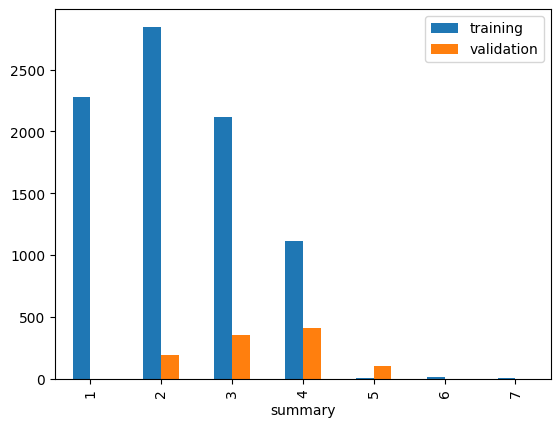

In [23]:
fig, ax = plt.subplots()
num_paper.plot.bar(x='summary', ax=ax)